In [2]:
import numpy as np
import pandas as pd
import matplotlib as plt 
import matplotlib.pyplot as plt
import matplotlib.dates as md
import seaborn as sns
from scipy import stats
import matplotlib.ticker as ticker
import holidays
from datetime import date 
import datetime
import matplotlib.cbook as cbook
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures










In [3]:

bdw = pd.read_csv('CBS_2021-2023_Daily_Weather_new.csv', sep=',')


In [68]:
bdw.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days,season,Holiday,is_weekend,weather_condition
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,No,Winter,Yes,False,rain
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,No,Winter,No,True,rain
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,No,Winter,No,True,rain
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,No,Winter,No,False,clear sky
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,No,Winter,No,False,drizzle


In [5]:
bdw.set_index(['Date'], inplace=True)
#bdw['Date'] = pd.to_datetime(bdw['Date'])


In [6]:
bdw.index

DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

In [4]:
'''bdw['warm_days'] = bdw['temperature_2m_mean (°C)'].apply(lambda value: 'Yes'
if value >= 12 else 'No')
bdw.head()'''

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,No
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,No
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,No
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,No
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,No


In [8]:
bdw.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1090    False
1091    False
1092    False
1093    False
1094    False
Length: 1095, dtype: bool

In [7]:
bdw.index = pd.to_datetime(bdw.index)
bdw.index


DatetimeIndex(['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04',
               '2021-01-05', '2021-01-06', '2021-01-07', '2021-01-08',
               '2021-01-09', '2021-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', name='Date', length=1095, freq=None)

In [8]:
def assign_season(row):
    month = row['Date'].month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'
    


In [9]:
bdw['season'] = bdw.apply(assign_season, axis=1)
bdw.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
 8   warm_days                       1095 non-null   object        
 9   season                          1095 non-null   object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(2)
memory usage: 85.7

In [10]:
from datetime import date 
import holidays 

# Select country 
us_holidays = holidays.US() 

# Print all the holidays in UnitedKingdom in year 2018 
for ptr in holidays.US(years = 2021).items(): 
	print(ptr) 


(datetime.date(2021, 1, 1), "New Year's Day")
(datetime.date(2021, 12, 31), "New Year's Day (observed)")
(datetime.date(2021, 5, 31), 'Memorial Day')
(datetime.date(2021, 6, 19), 'Juneteenth National Independence Day')
(datetime.date(2021, 6, 18), 'Juneteenth National Independence Day (observed)')
(datetime.date(2021, 7, 4), 'Independence Day')
(datetime.date(2021, 7, 5), 'Independence Day (observed)')
(datetime.date(2021, 9, 6), 'Labor Day')
(datetime.date(2021, 11, 11), 'Veterans Day')
(datetime.date(2021, 11, 25), 'Thanksgiving')
(datetime.date(2021, 12, 25), 'Christmas Day')
(datetime.date(2021, 12, 24), 'Christmas Day (observed)')
(datetime.date(2021, 1, 18), 'Martin Luther King Jr. Day')
(datetime.date(2021, 2, 15), "Washington's Birthday")
(datetime.date(2021, 10, 11), 'Columbus Day')


In [11]:
us_holidays = holidays.US()
bdw['Holiday'] = bdw['Date'].apply(lambda x: x in us_holidays)
bdw['Holiday'] = bdw['Holiday'].map({True: 'Yes', False: 'No'})
bdw.head()



,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days,season,Holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,No,Winter,Yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,No,Winter,No
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,No,Winter,No
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,No,Winter,No
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,No,Winter,No


In [15]:
def is_weekend(date):
    week_day = date.weekday()
    return week_day >= 5


In [16]:
bdw['is_weekend']=bdw['Date'].apply(is_weekend)
bdw.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days,season,Holiday,is_weekend
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,No,Winter,Yes,False
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,No,Winter,No,True
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,No,Winter,No,True
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,No,Winter,No,False
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,No,Winter,No,False


In [20]:
def assign_weather(row):
    wc = row['weathercode (wmo code)']
    if 0 <= wc <= 3:
        return 'clear sky'
    elif 51 <= wc <= 55:
        return 'drizzle'
    elif 61 <= wc <= 65:
        return 'rain'
    else:
        return 'snowflakes'
    


In [21]:
bdw['weather_condition'] = bdw.apply(assign_weather, axis=1)


In [11]:
bdw.head()

,Casual,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days,season,Holiday,is_weekend,weather_condition
Date,,,,,,,,,,,,
2021-01-01,371,590,961,-0.9,2.3,63,10.6,No,Winter,Yes,False,rain
2021-01-02,2874,2844,5718,4.8,7.6,61,19.1,No,Winter,No,True,rain
2021-01-03,495,1133,1628,0.9,3.9,63,13.0,No,Winter,No,True,rain
2021-01-04,907,2074,2981,1.0,4.1,3,13.3,No,Winter,No,False,clear sky
2021-01-05,1057,2004,3061,1.4,4.0,51,9.2,No,Winter,No,False,drizzle


In [23]:
'''saving new version'''
#bdw.to_csv('CBS_2021-2023_Daily_Weather_new.csv',index=False)

Total rides across temperature

<Axes: xlabel='temperature_2m_mean (°C)', ylabel='Total_rides'>

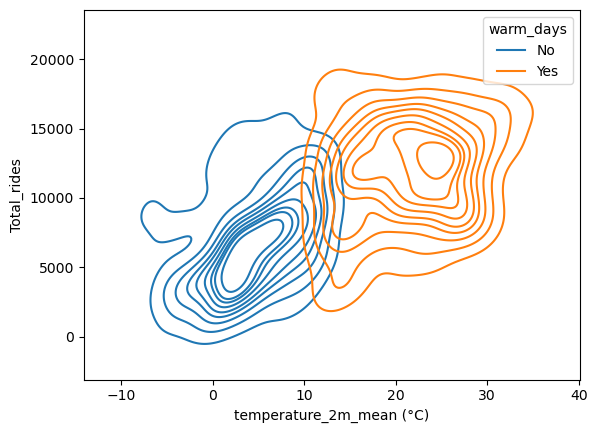

In [7]:
                       
sns.kdeplot(data=bdw, y="Total_rides", x="temperature_2m_mean (°C)", hue="warm_days")


In [57]:
#from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
#le = LabelEncoder()

# Apply it to a single column
#bdw['warm_days_enc'] = le.fit_transform(bdw['warm_days'])

#print(bdw[['warm_days', 'warm_days_enc']])


           warm_days  warm_days_enc
Date                               
2021-01-01        No              0
2021-01-02        No              0
2021-01-03        No              0
2021-01-04        No              0
2021-01-05        No              0
...              ...            ...
2023-12-27        No              0
2023-12-28        No              0
2023-12-29        No              0
2023-12-30        No              0
2023-12-31        No              0

[1095 rows x 2 columns]


In [93]:
#bdw.loc[bdw['warm_days_enc']==1]

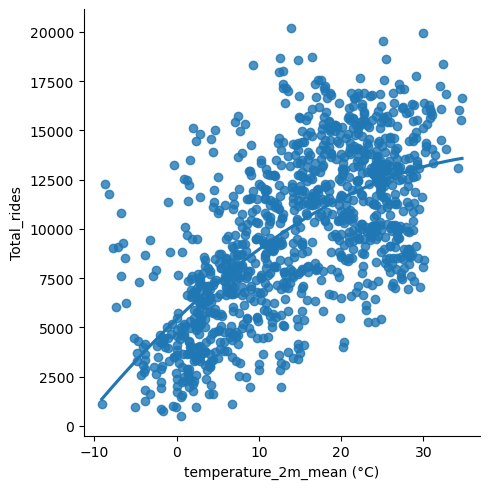

In [19]:
sns.lmplot(y="Total_rides", x="temperature_2m_mean (°C)", data=bdw, order=2, ci=None)

Polynomial Regression

In [21]:
x_Temp = bdw[['temperature_2m_mean (°C)']]
y_TR = bdw[['Total_rides']] 

#Transform the x data for a 2nd degree polynomial
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x_Temp)

#fit the LR model
linreg_model2 = LinearRegression()
linreg_model2.fit(x_poly,y_TR)

#predict for visualization
y_poly_pred = linreg_model2.predict(x_poly)


Let's split our data and train it

In [22]:
from sklearn.model_selection import train_test_split

X_train_pl, X_test_pl, y_train_pl, y_test_pl = train_test_split(x_Temp, y_TR, test_size=0.2, random_state=42)



In [48]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
x_poly = poly.fit_transform(X_train_pl)
X_test_poly = poly.transform(X_test_pl)

linreg_model2 = LinearRegression()
linreg_model2.fit(x_poly,y_train_pl)

y_poly_pred = linreg_model2.predict(X_test_poly)


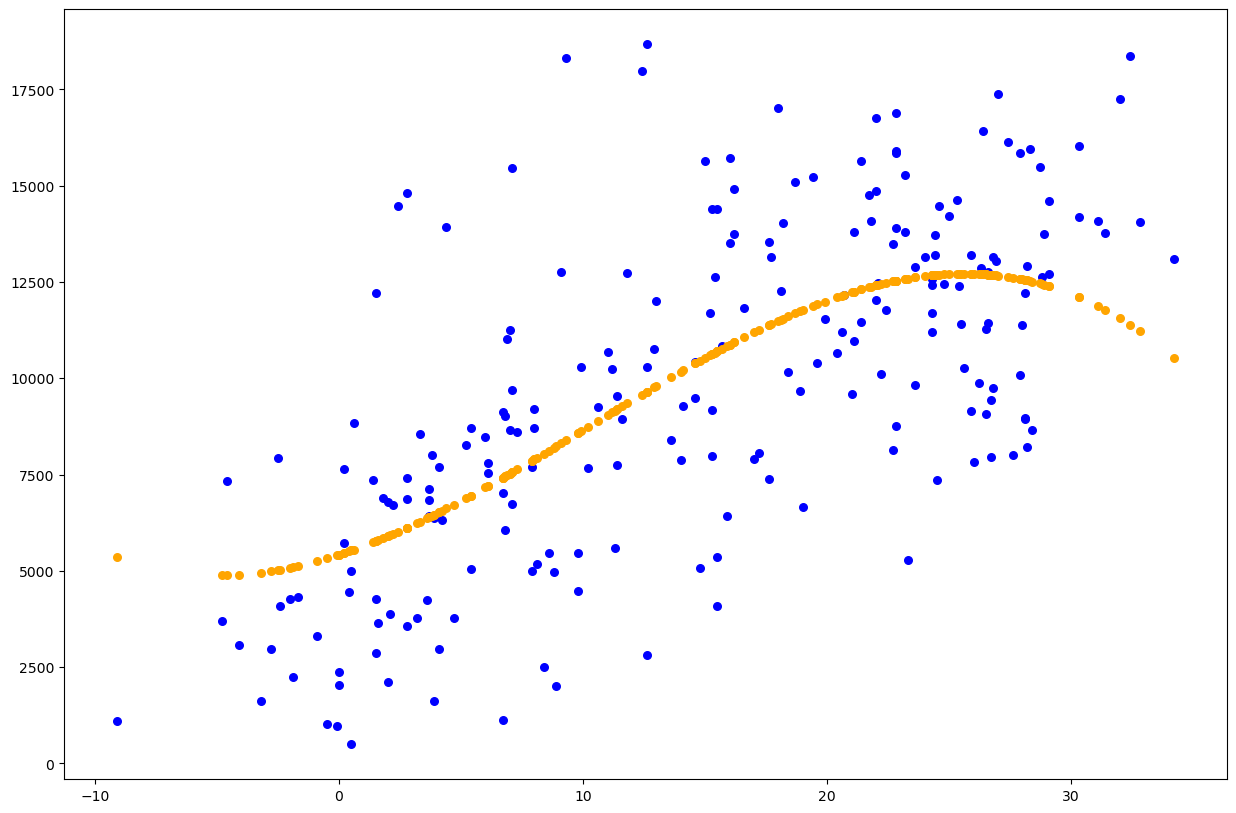

In [54]:
X_sorted, y_poly_pred_sorted = zip(*sorted(zip(x_Temp, y_poly_pred), key=lambda e: e[0]))

plt.figure(figsize=(15,10))
plt.scatter(X_test_pl, y_test_pl, s=30, color='blue')
plt.scatter(X_test_pl, y_poly_pred, s=30, color = 'orange')

#plt.plot(X_sorted, y_poly_pred_sorted, color='r')
plt.show()

In [40]:
from sklearn.metrics import mean_squared_error,r2_score

rmse = np.sqrt(mean_squared_error(y_train_pl,y_poly_pred))
r2 = r2_score(y_train_pl,y_poly_pred)
print("RMSE Score for Test set: " +"{:.2}".format(rmse))
print("R2 Score for Test set: " +"{:.2}".format(r2))

RMSE Score for Test set: 3.1e+03
R2 Score for Test set: 0.41


Linear Regression with two variables

In [74]:


# Define your features (X) and target (y)
X = bdw[['temperature_2m_mean (°C)']]    # Dependent variable
Y = bdw[['Total_rides']]  # Independent variable(s)




In [75]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Let's train

In [76]:
linreg_model = linear_model.LinearRegression()
linreg_model.fit(Y_train, X_train)


LinearRegression()

In [71]:
# Predict values using test data.
linreg_score = (linreg_model.score(Y_test, X_test) * 100)
print("The accuracy of the ML model based on total rides vs temperature is:", linreg_score , "%")


The accuracy of the ML model based on total rides vs temperature is: 44.0600233763013 %


In [77]:
y_pred= linreg_model.predict(Y_test)  # Predict Linear Model

In [78]:
from sklearn.metrics import mean_squared_error,r2_score

print("R2 Score: " +"{:.3}".format(r2_score(X_test, y_pred)))
print("MSE: " +"{:.3}".format(mean_squared_error(X_test, y_pred)))

R2 Score: 0.441
MSE: 58.7


In [83]:
y_pred.shape

(219, 1)

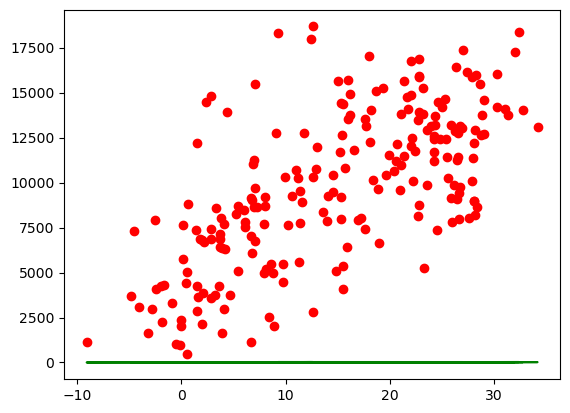

In [79]:
# Finally draw figure of Linear Regression Model

plt.scatter(X_test, Y_test, color='r')
plt.plot(X_test, y_pred, color='g')
plt.show()

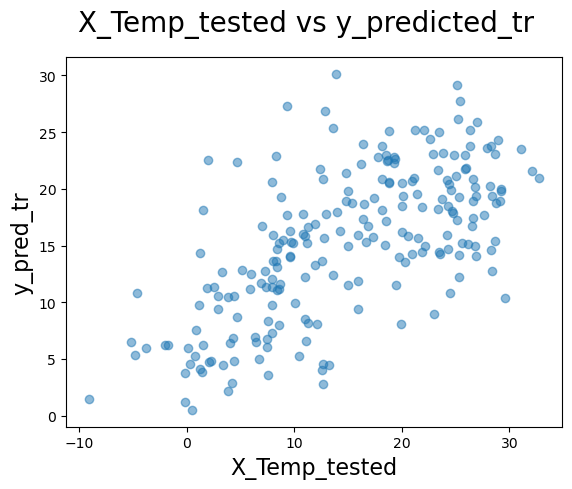

In [37]:
#MODEL EVALUATION
# # Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(X_Temp_test, y_pred_tr, alpha=.5)
fig.suptitle('X_Temp_tested vs y_predicted_tr', fontsize = 20)
plt.xlabel('X_Temp_tested', fontsize = 16)
plt.ylabel('y_pred_tr', fontsize = 16)
plt.show()

Total rides across all seasons
(Autumn reveals larger distribution in autumn compared to summer)

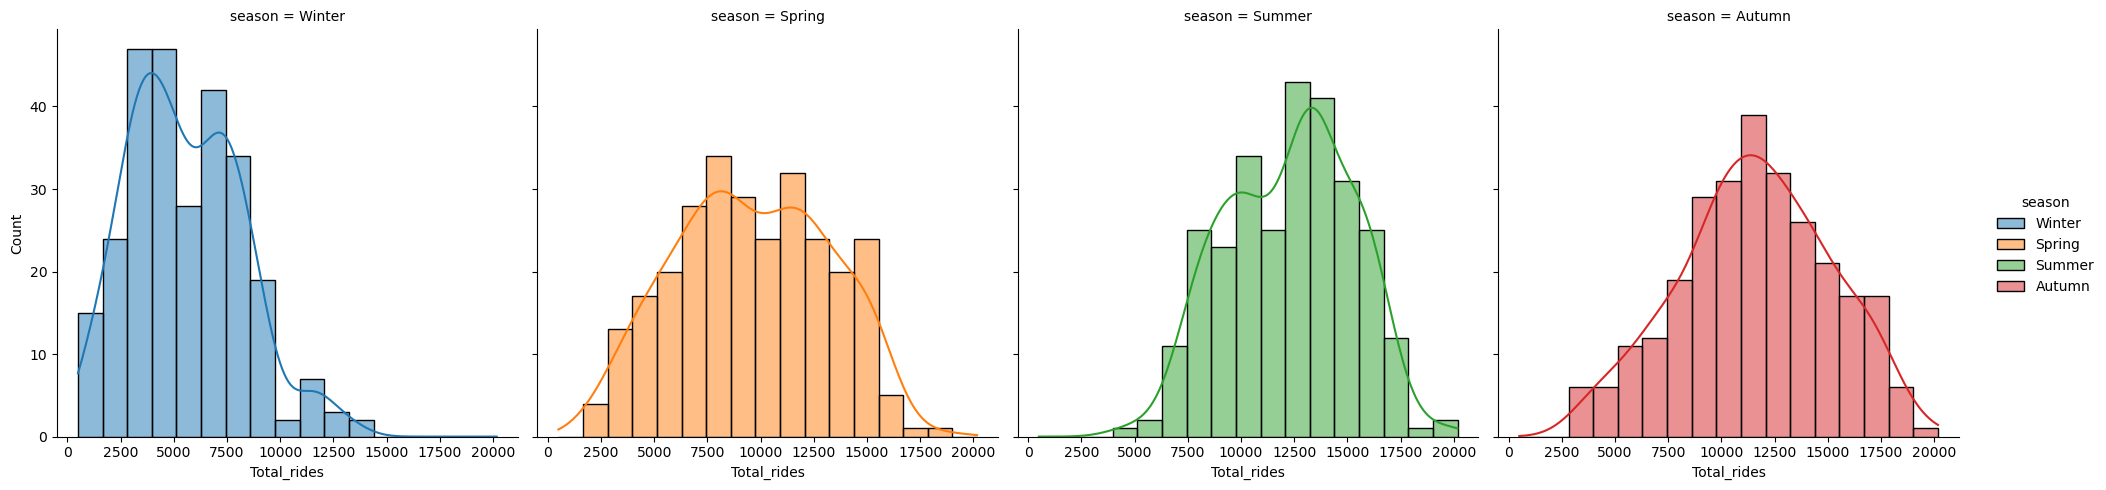

In [55]:
                       
sns.displot(data=bdw, x="Total_rides", kde=True, hue="season", col='season')


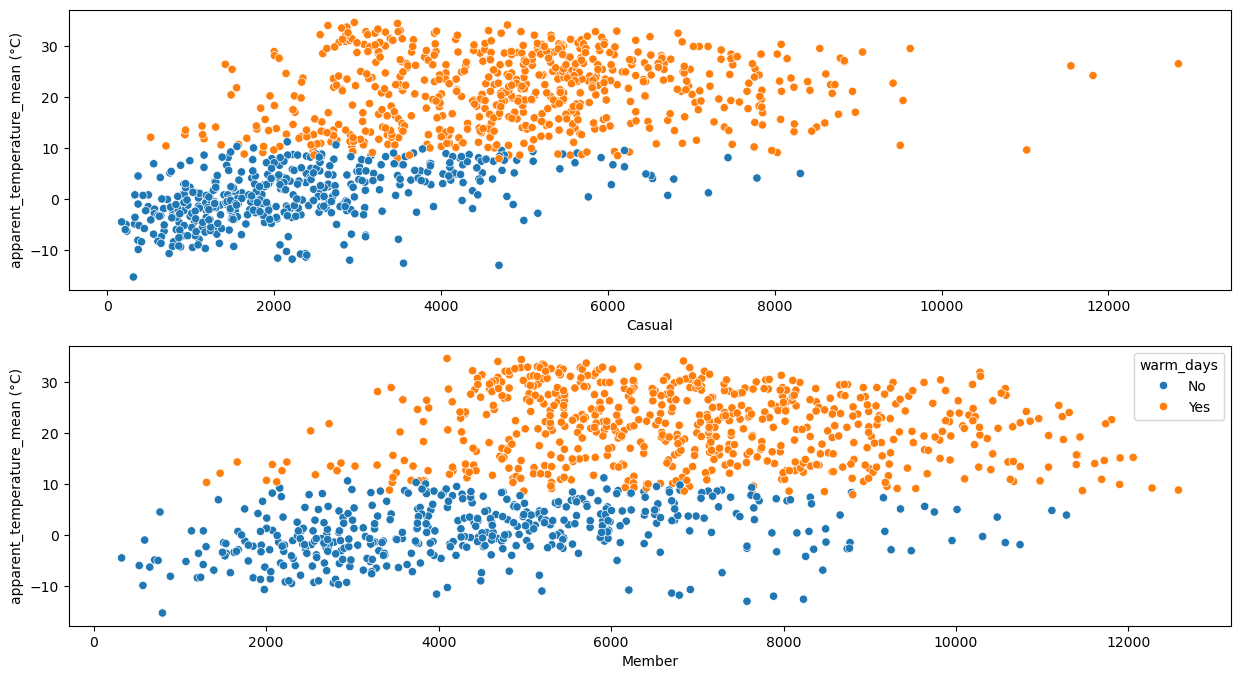

In [33]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))
sns.scatterplot(data=bdw, y='apparent_temperature_mean (°C)', x='Casual', hue='warm_days', ax=axes[0], legend=False)
sns.scatterplot(data=bdw, y='apparent_temperature_mean (°C)', x='Member', hue='warm_days', ax=axes[1],)

plt.show()


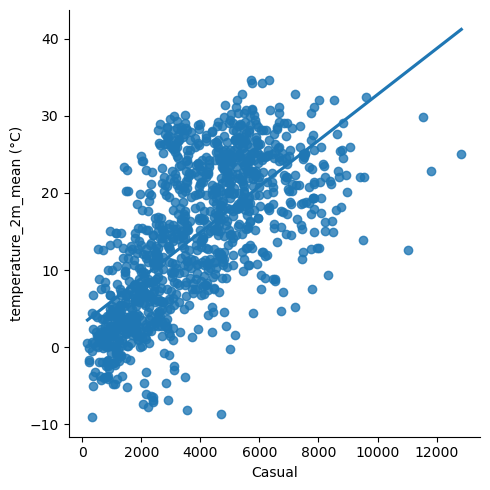

In [6]:
sns.lmplot(data=bdw, x='Casual',y="temperature_2m_mean (°C)", order=1, ci=None)

<Axes: xlabel='Date', ylabel='Member'>

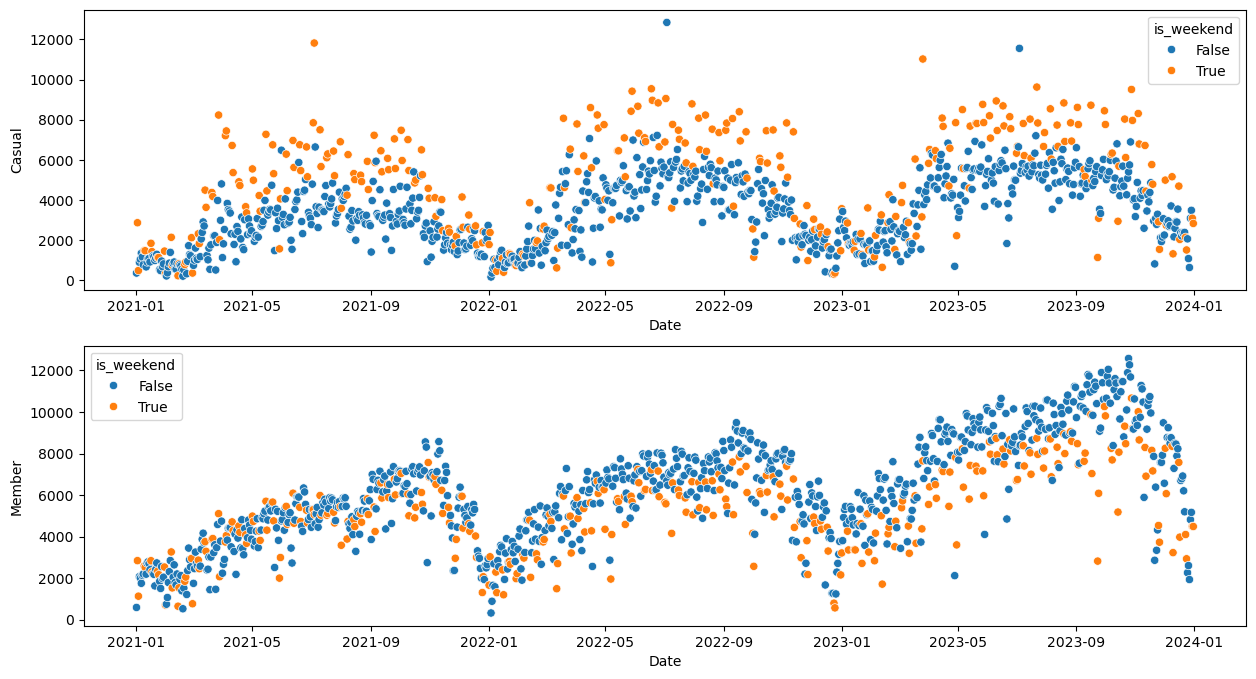

In [81]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))

sns.scatterplot(data=bdw, ax=axes[0], x=bdw.index, y="Casual", hue="is_weekend")
sns.scatterplot(data=bdw, ax=axes[1], x=bdw.index, y="Member", hue="is_weekend")



In [66]:
bdw.index

RangeIndex(start=0, stop=1095, step=1)

<Axes: xlabel='Date', ylabel='Member'>

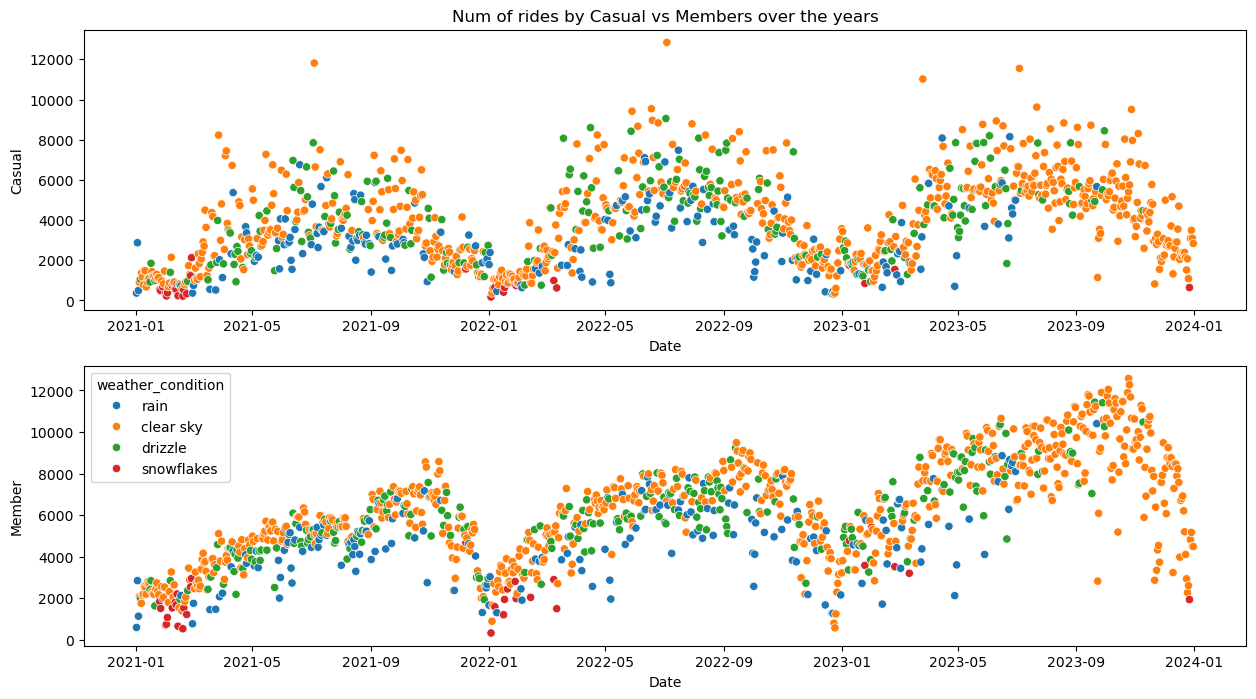

In [72]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))

sns.scatterplot(data=bdw, ax=axes[0], x=bdw.index, y="Casual", hue="weather_condition", legend=False).set_title('Num of rides by Casual vs Members over the years')
sns.scatterplot(data=bdw, ax=axes[1], x=bdw.index, y='Member', hue="weather_condition")


In [60]:
bdw.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)', 'warm_days',
       'season', 'Holiday', 'is_weekend', 'weather_condition'],
      dtype='object')

In [64]:

sns.lmplot(data=bdw, x=bdw.index, y="Casual", hue="Holiday").set_title('Num of rides by Casual users on holidays')


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

<Axes: xlabel='Date', ylabel='Casual'>

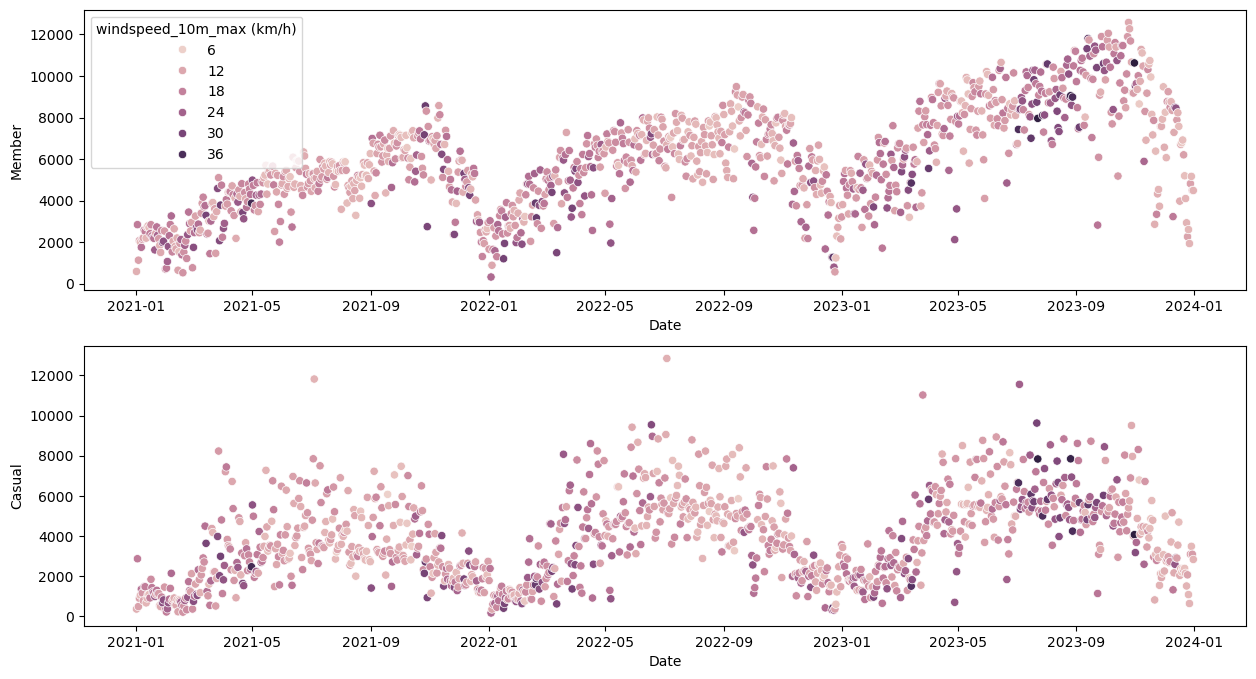

In [78]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))

sns.scatterplot(data=bdw, ax=axes[0], x=bdw.index, y="Member", hue="windspeed_10m_max (km/h)")
sns.scatterplot(data=bdw, ax=axes[1], x=bdw.index, y='Casual', hue="windspeed_10m_max (km/h)", legend=False)


In [58]:
bdw.columns

Index(['Casual', 'Date', 'Member', 'Total_rides',
       'apparent_temperature_mean (°C)', 'temperature_2m_mean (°C)',
       'weathercode (wmo code)', 'windspeed_10m_max (km/h)', 'warm_days',
       'season', 'Holiday', 'is_weekend', 'weather_condition'],
      dtype='object')

In [ ]:
fig, axes = plt.subplots(nrows= 2 , ncols= 1, figsize = (15,8))

sns.scatterplot(data=bdw, ax=axes[0], x=bdw.index, y="Member", hue="Holi")
sns.scatterplot(data=bdw, ax=axes[1], x=bdw.index, y='Casual', hue="windspeed_10m_max (km/h)", legend=False)


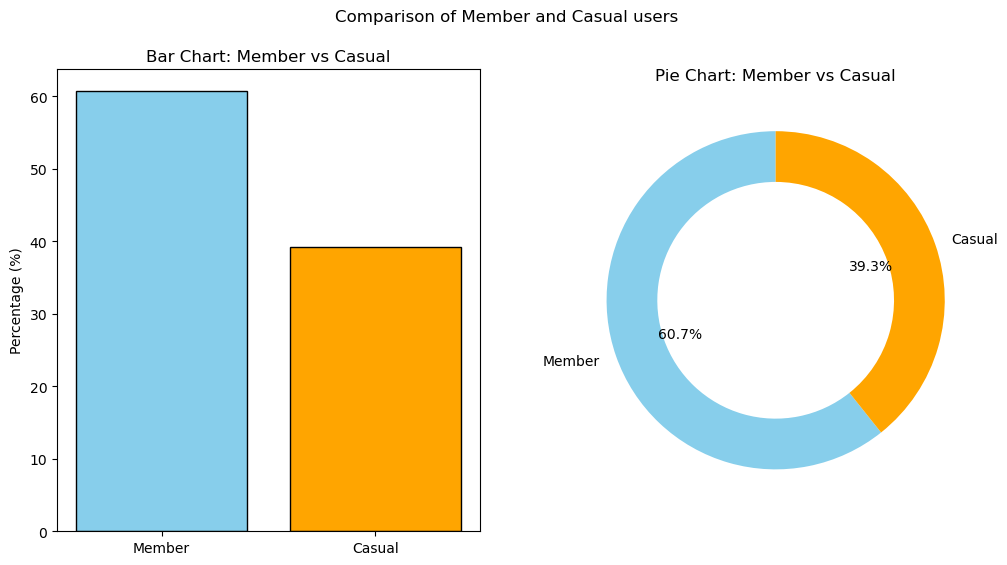

In [75]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your dataset
# Assuming 'bhw' is already loaded as a pandas DataFrame
# data = bhw  # Uncomment if needed

# Step 2: Calculate total occurrences
# Assuming you want to compare the total occurrences of 'Member' and 'Casual'

# Calculate the sum of each column
member_total = bdw['Member'].sum()
casual_total = bdw['Casual'].sum()

# Calculate total occurrences (for calculating percentages)
total = member_total + casual_total

# Calculate percentages
member_percentage = (member_total / total) * 100
casual_percentage = (casual_total / total) * 100

# Prepare data for plotting
labels = ['Member', 'Casual']
sizes = [member_percentage, casual_percentage]

# Step 3: Create the "Bar of Pie" chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar Chart
ax1.bar(labels, sizes, color=['skyblue', 'orange'], edgecolor='black')
ax1.set_title('Bar Chart: Member vs Casual')
ax1.set_ylabel('Percentage (%)')

# Pie Chart
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'],
        wedgeprops=dict(width=0.3))  # Donut style
ax2.set_title('Pie Chart: Member vs Casual')

# Add a super title to the figure
plt.suptitle('Comparison of Member and Casual users')

# Display the plot
plt.show()


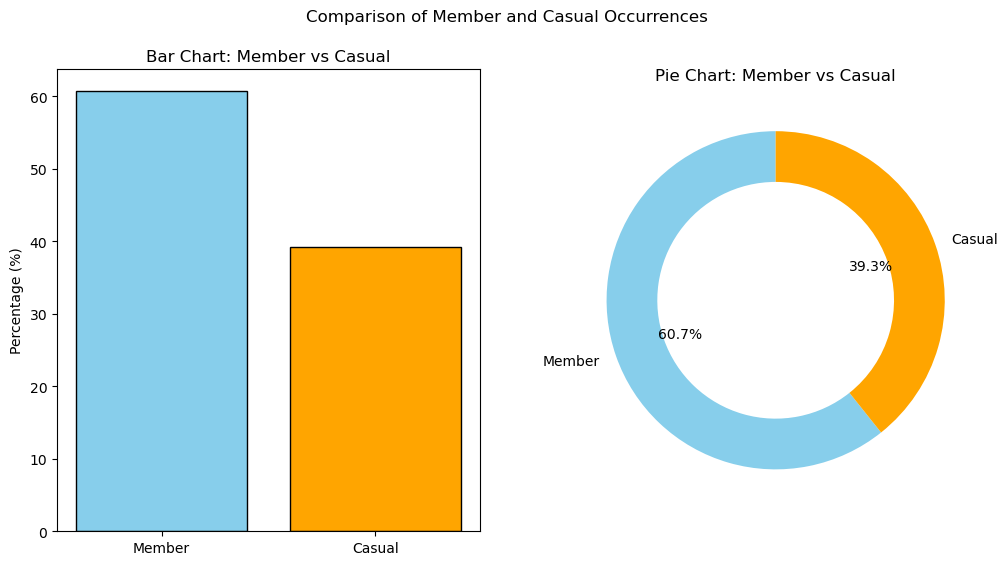

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load your dataset
# Assuming 'bhw' is already loaded as a pandas DataFrame
# data = bhw  # Uncomment if needed

# Step 2: Calculate total occurrences
# Assuming you want to compare the total occurrences of 'Member' and 'Casual'

# Calculate the sum of each column
member_total = bhw['Member'].sum()
casual_total = bhw['Casual'].sum()

# Calculate total occurrences (for calculating percentages)
total = member_total + casual_total

# Calculate percentages
member_percentage = (member_total / total) * 100
casual_percentage = (casual_total / total) * 100

# Prepare data for plotting
labels = ['Member', 'Casual']
sizes = [member_percentage, casual_percentage]

# Step 3: Create the "Bar of Pie" chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar Chart
ax1.bar(labels, sizes, color=['skyblue', 'orange'], edgecolor='black')
ax1.set_title('Bar Chart: Member vs Casual')
ax1.set_ylabel('Percentage (%)')

# Pie Chart
ax2.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange'],
        wedgeprops=dict(width=0.3))  # Donut style
ax2.set_title('Pie Chart: Member vs Casual')

# Add a super title to the figure
plt.suptitle('Comparison of Member and Casual Occurrences')

# Display the plot
plt.show()


In [ ]:
bdw.pivot(index=bdw.index, columns="month", values="passengers")
sns.barplot(bdw)

In [37]:
bdw_indexed = bdw_indexed.loc['2022-02-01':'2023-03-01']
bdw_indexed.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),warm_days,season,Holiday,is_weekend,weather_condition


In [67]:
bdw.loc[(bdw['season']=='Spring')]


,Casual,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h),season,warm_days,Holiday
Date,,,,,,,,,,
2021-03-01,753,1750,2503,5.2,8.4,63,27.8,Spring,No,No
2021-03-02,1014,2459,3473,-2.7,2.3,0,20.6,Spring,No,No
2021-03-03,1615,3256,4871,1.3,5.2,0,12.6,Spring,No,No
2021-03-04,1107,2709,3816,1.2,6.1,3,24.2,Spring,No,No
2021-03-05,1048,2586,3634,-4.3,1.6,2,27.8,Spring,No,No
...,...,...,...,...,...,...,...,...,...,...
2023-05-27,8764,7165,15929,16.7,18.2,1,13.5,Spring,Yes,No
2023-05-28,7856,5968,13824,17.0,17.9,53,13.8,Spring,Yes,No
2023-05-29,3687,4106,7793,20.7,19.5,61,13.3,Spring,Yes,Yes


In [13]:
# First, we must import Folium.
import folium
import json
import pandas as pd
import requests


In [ ]:
# Coordinates for the center of Washington, DC
dc_center = [38.89511, -77.03637]

# Create a folium map centered on Washington, DC
m = folium.Map(location=dc_center, zoom_start=12)

# Washington DC GeoJSON data (you can replace this with any other valid GeoJSON URL)
# This is a sample URL for DC boundaries. You can also load GeoJSON files locally.
url = "https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json"

# Add the GeoJSON layer to the map
folium.GeoJson(url, name="geojson").add_to(m)

# Add layer control to toggle GeoJSON on/off
folium.LayerControl().add_to(m)

# Show the map
m.save("washington_dc_map.html")

# To display the map directly in a Jupyter Notebook, you can use:
m


In [ ]:
geodata=pd.read_excel('bikeshare_geodata.xlsx')


In [30]:
geodata.drop(['Unnamed: 0'], axis=1, inplace=True)

In [34]:
geodata.head()

,location,start station
0,"(38.8972217, -77.019347)",5th & F St NW
1,"(38.9267997, -77.0322)",14th & Harvard St NW
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW


In [20]:
import folium
import json

# Set the initial location (latitude, longitude) for centering the map
# For Washington, DC (you can change to your desired location)
center_location = [38.89511, -77.03637]

# Create a folium map centered at the desired location
m = folium.Map(location=center_location, zoom_start=12)

# Load your GeoJSON file from local storage
Metrostation_file = 'Metro_Stations_Regional.geojson'  # Replace with your file path

# Open and load the GeoJSON data
with open(Metrostation_file) as f:
    Metrostation_file = json.load(f)

# Add the GeoJSON layer to the map
folium.GeoJson(Metrostation_file, name="geojson").add_to(m)

# Add layer control to toggle GeoJSON on/off
folium.LayerControl().add_to(m)

# Save the map as an HTML file and display
m.save("Metrostation_map.html")

# In Jupyter Notebooks, you can display it directly by using:
m


In [ ]:
import folium
import pandas as pd

# Load your existing map (e.g., centered on Washington DC)
m = folium.Map(location=[38.89511, -77.03637], zoom_start=12)


# Assuming 'location' column has string values like "(latitude, longitude)"
# We will split the 'location' column into latitude and longitude
geodata['latitude'] = geodata['location'].apply(lambda x: float(x.strip('()').split(', ')[0]))
geodata['longitude'] = geodata['location'].apply(lambda x: float(x.strip('()').split(', ')[1]))

# Loop through each row and add markers to the map
for index, row in geodata.iterrows():
    lat = row['latitude']  # Extract latitude from the split
    lon = row['longitude']  # Extract longitude from the split
    name = row.get('name', 'Bike stations')  # Optional: Replace 'name' with the relevant column

    # Add a marker to the folium map
    folium.Marker(
        location=[lat, lon],
        popup=name,  # Optional popup for location names
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Add layer control for better interaction
folium.LayerControl().add_to(m)

# Save and display the map
#m.save('map_with_location_column.html')

# In Jupyter Notebooks, you can display it directly using:
m


In [43]:
geodata.head()

,location,start station,latitude,longitude
0,"(38.8972217, -77.019347)",5th & F St NW,38.897222,-77.019347
1,"(38.9267997, -77.0322)",14th & Harvard St NW,38.926800,-77.032200
2,"(38.9366935, -77.0241778)",Georgia & New Hampshire Ave NW,38.936693,-77.024178
3,"(38.91711546315044, -77.02599642535804)",10th & U St NW,38.917115,-77.025996
4,"(38.9230634, -77.0425361)",Adams Mill & Columbia Rd NW,38.923063,-77.042536


In [3]:
bdw.shape


(1095, 13)

In [4]:
bdw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
 8   warm_days                       1095 non-null   object 
 9   season                          1095 non-null   object 
 10  Holiday                         1095 non-null   object 
 11  is_weekend                      1095 non-null   bool   
 12  weather_condition               10

In [59]:
import folium
import pandas as pd

# Step 1: Load the Metrostation GeoJSON file
Metrostation_file = 'Metro_Stations_Regional.geojson'  # Replace with your actual GeoJSON file path
m = folium.Map(location=[38.89511, -77.03637], zoom_start=12)

# Add the metro station boundaries (GeoJSON) to the map
folium.GeoJson(Metrostation_file, name="Metro Stations").add_to(m)

# Step 2: Load the bike data (with latitude and longitude)

# Assuming 'latitude' and 'longitude' columns exist in the bike data
# Add markers for bike locations on the map
for index, row in geodata.iterrows():
    lat = row['latitude']  # Replace with the actual column name for latitude
    lon = row['longitude']  # Replace with the actual column name for longitude
    name = row.get('bike_station_name', 'Bike Station')  # Optional, replace 'bike_station_name' with correct name

    # Add bike station markers (e.g., blue markers for bikes)
    folium.Marker(
        location=[lat, lon],
        popup=name,  # Popup to show bike station name
        icon=folium.Icon(color='red', icon='bicycle')  # Use a blue bicycle icon
    ).add_to(m)

# Step 3: Add Layer Control (allows toggling GeoJSON and markers)
folium.LayerControl().add_to(m)

# Step 4: Save and display the map
m.save('metro_bike_map.html')

# In Jupyter Notebooks, you can display it directly using:
m
